In [1]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [2]:
def dis(z,c):
    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sum

In [3]:
def assign_cluster_label(data, centers):
    cluster_labels = []
    for point in data:
        # compute distances between three cluster centers to a data point
        distances = [dis(point, center) for center in centers]
        # find which cluster is closest to the data point and assign the cluster  it
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [4]:
def gen_wolf(n_cluster,dim):
    graywolf=[]
    for j in range(n_cluster):
        c=[]
        for i in range(dim):
            ub=x[i].max()
            lb=x[i].min()
            c.append(np.random.uniform(0,1) *(ub-lb)+lb)
        graywolf.append(c)
    return np.array(graywolf)

In [5]:
def init_pop(n_pop,n_cluster,dim):
    init_pop=[]
    for i in range (n_pop):
        #index = np.random.choice(list(range(len(x))), 3)
        z=gen_wolf(n_cluster,dim)
        
        init_pop.append(np.array(z))
    return np.array(init_pop)

In [6]:
from math import sqrt
def dist_f(z,c):

    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sqrt(sum)

In [7]:
def fitness(data,Positions,current_labels,i):
    #fitnesses=[]
    
    #for i in range(len(gw)):
        
    bank=0
    for j in range(len(Positions[i])):
        for k in range(len(current_labels)):
                
            if current_labels[k]==j:
                bank =bank + dist_f(data[k],Positions[i][j])
        #fitnesses.append(bank)
        
    return bank

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
wine = datasets.load_wine()
x=pd.DataFrame(wine.data)

In [9]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
import random
import numpy
import math
#from solution import solution
import time


    

def GWO(Max_iter,SearchAgents_no,n_cluster,dim):
    
   
    ggnn=0
    data=np.array(x)

    levy=np.zeros(SearchAgents_no)
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros((n_cluster,dim))
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros((n_cluster,dim))
    Beta_score=float("inf")
    
    Delta_pos=np.zeros((n_cluster,dim))
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=init_pop(SearchAgents_no,n_cluster,dim)
    
    Convergence_curve=numpy.zeros(Max_iter)
    sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    
    
    #sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    #timerStart=time.time() 
    #sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            #Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            
            current_centers=pd.DataFrame(Positions[i])
            current_labels = assign_cluster_label(data,Positions[i])
            current_centers.columns=['x','y','z','k','a','b','c','d','e','f','g','h','i']
            fitness1=fitness(data,Positions,current_labels,i)
            
            # Update Alpha, Beta, and Delta
            if fitness1<Alpha_score :
                Alpha_score=fitness1; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1<Beta_score ):
                Beta_score=fitness1  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1>Beta_score and fitness1<Delta_score): 
                Delta_score=fitness1 # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        #z=numpy.random.uniform()
        #z=4*z*(1-z)
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        beta=0.5
        sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta);
        
        for i in range(0,SearchAgents_no):
            for j in range (0,n_cluster):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
            
            s=Positions[i,:]
            
            u=numpy.random.uniform(size=dim)*sigma
            v=numpy.random.uniform(size=dim)
            step=u*abs(v)**(1/beta)
            stepsize=0.1*step*(s-Alpha_pos) #s-alpha_pos
            s=s+stepsize*numpy.random.uniform(size=dim)
            Positions[i]=s
        Convergence_curve[l]=Alpha_score

    timerEnd=time.time()  
    sol.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    sol.executionTime=timerEnd-timerStart
    sol.convergence=Convergence_curve
    sol.optimizer="GWO"
    
    sol.no_of_iterations=l
    
    
    
    
    print(Alpha_pos)
    return Alpha_pos,current_labels,sol

In [20]:
current_centers=pd.DataFrame(egwo[0])

In [18]:
egwo=GWO(Max_iter=100,SearchAgents_no=20,n_cluster=3,dim=13)

[[1.17341894e+01 2.19318131e+00 1.76784832e+00 2.51654140e+01
  1.05810345e+02 2.20175436e+00 2.23951742e+00 3.27351136e-01
  7.68970452e-01 9.60437417e+00 6.47356742e-01 2.14983823e+00
  6.92416187e+02]
 [1.40039090e+01 3.16667398e+00 2.40325895e+00 2.10166645e+01
  1.16865036e+02 2.34732597e+00 1.14952509e+00 4.97521880e-01
  3.23877871e+00 2.70444371e+00 8.22915222e-01 2.02403593e+00
  1.13087154e+03]
 [1.02710558e+01 2.16795368e+00 1.69796118e+00 1.11184206e+01
  7.84985460e+01 2.34988978e+00 2.10678775e+00 2.04964258e-01
  1.00499446e+00 5.19289833e+00 6.54631478e-01 1.88161494e+00
  4.76985583e+02]]


In [21]:
current_centers.columns=['x','y','z','k','a','b','c','d','e','f','g','h','i']

In [22]:
current_labels=egwo[1]

In [24]:
data=np.array(x)
data_df = pd.DataFrame(data)
data_df.columns=['x','y','z','k','a','b','c','d','e','f','g','h','i']

Text(0.5, 0, 'y')

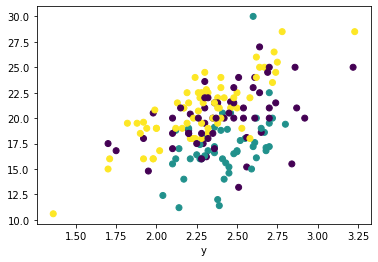

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x='z',y='k',c=current_labels,data=data_df)
#plt.scatter(x='z',y='k',data=current_centers,c=['purple','blue','yellow'],marker='*', s=200)
plt.xlabel("x")
plt.xlabel("y")

In [30]:
x1=[]
for i in range(100):
    x1.append(i)

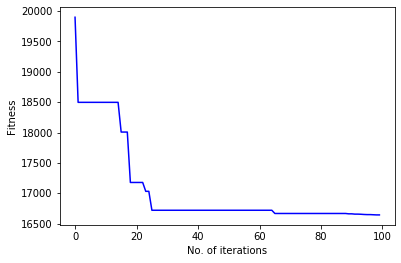

In [31]:
plt.plot(x1,egwo[2].convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_F1.png")
plt.show()